In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from upsetplot import from_contents, plot
from matplotlib import pyplot

from pathlib import Path

In [2]:
design_matrix_test = pd.read_csv(
    "design_matrix_test_predictions.tsv",
    sep='\t'
)

In [3]:
design_matrix_val = pd.read_csv(
    "design_matrix_val_predictions.tsv",
    sep='\t'
)

In [4]:
probability_columns = [
    col for col in design_matrix_test.columns if "probability" in col
]
probability_columns

['resp_probability',
 'coag_probability',
 'cns_probability',
 'renal_probability',
 'cardiovasc_probability',
 'liver_probability',
 'sofa_probability']

In [5]:
organ_dysfunction_overlaps = [
    'resp_probability',
    'renal_probability',
    'coag_probability',
    'cardiovasc_probability',
    'cns_probability',
    'liver_probability'
]

In [6]:
prediction_columns = []

base_names = []

prediction_overlaps = dict()

for col in organ_dysfunction_overlaps:

    design_matrix_test[f"{col.split('_')[0]}_prediction"] = np.where(design_matrix_test[col] > 0.5, 1, 0)

    prediction_overlaps[f"{col.split('_')[0]}"] = design_matrix_test[design_matrix_test[f"{col.split('_')[0]}_prediction"] == 1]['injection'].to_list()

    prediction_columns.append(f"{col.split('_')[0]}_prediction")

    base_names.append(f"{col.split('_')[0]}")

In [7]:
unique_panels = list(prediction_overlaps.keys())
unique_panels

['resp', 'renal', 'coag', 'cardiovasc', 'cns', 'liver']

In [8]:
import colorcet as cc
colors = sns.color_palette(cc.glasbey_hv, n_colors=len(unique_panels))
colors

[(0.188235, 0.635294, 0.854902),
 (0.988235, 0.309804, 0.188235),
 (0.898039, 0.682353, 0.219608),
 (0.427451, 0.564706, 0.309804),
 (0.545098, 0.545098, 0.545098),
 (0.090196, 0.745098, 0.811765)]

In [9]:
prediction_contents = from_contents(prediction_overlaps)

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

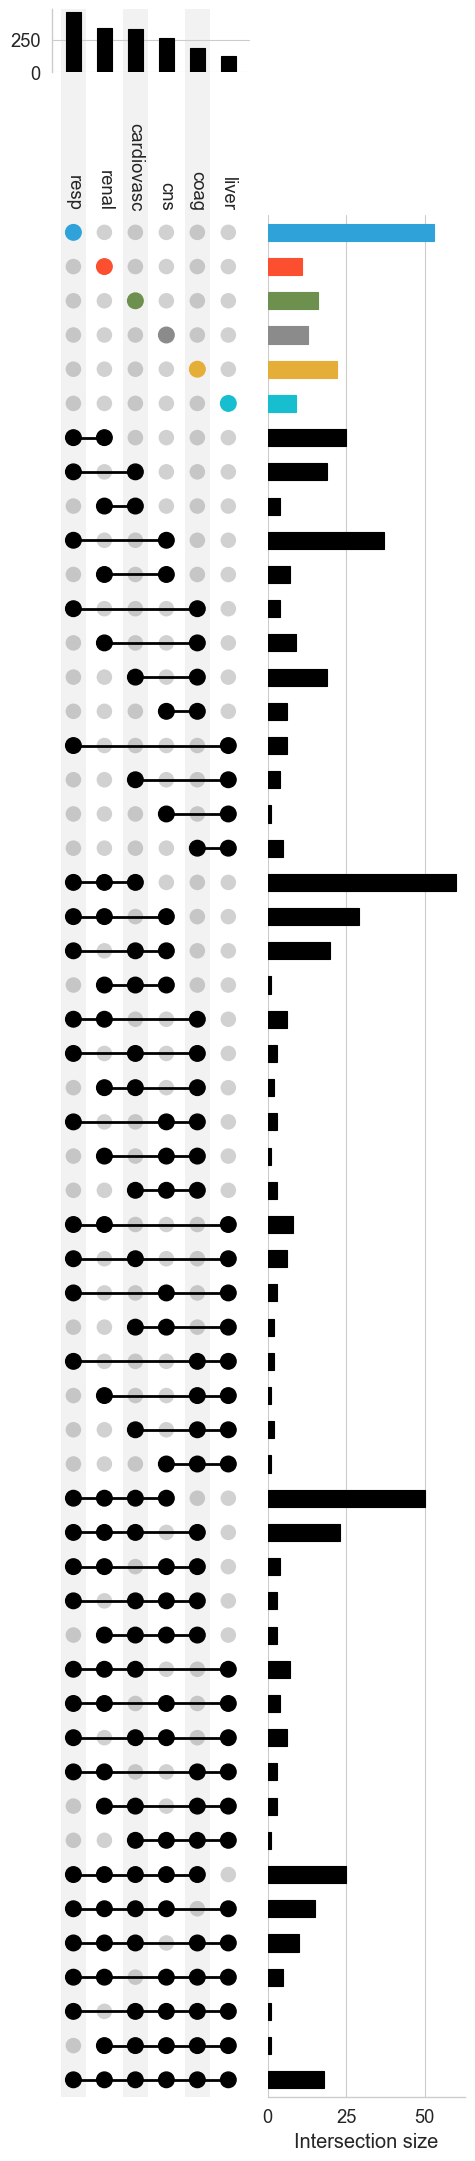

In [10]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, generate_counts

#fig, ax = plt.subplots()

sns.set_theme(font_scale=1.5, context="paper", style="whitegrid")

upset = UpSet(prediction_contents, orientation="vertical")

for i in range(len(unique_panels)):

    upset.style_subsets(
        present=[unique_panels[i]],
        facecolor=colors[i],
        absent=[panel for panel in unique_panels if panel != unique_panels[i]]
    )

upset.plot()

fig = plt.gcf()

In [11]:
fig.savefig(
    "organ_dysfunction_combinations.pdf", dpi=300, bbox_inches="tight"
)

In [12]:
len(set(prediction_contents.index.values))

55

In [13]:
prediction_contents.reset_index()[base_names].sum()

resp          458
renal         335
coag          189
cardiovasc    327
cns           263
liver         124
dtype: int64